C:\Users\HP\AppData\Local\Temp\ipykernel_13040\128856365.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_updated['Cluster'] = clusters


Silhouette Score for GMM: 0.06301300616855272
Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

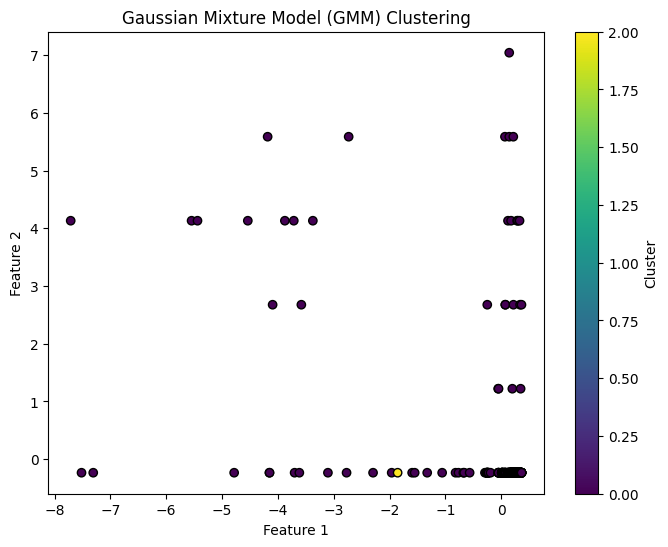

In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Step 1: Read the updated dataset (first 500 records)
file_path_updated = 'updated_dataset.csv'
df_updated = pd.read_csv(file_path_updated, nrows=500)

# Step 2: Handle missing or NaN values
numeric_columns = df_updated.select_dtypes(include=['float64', 'int64']).columns
df_updated[numeric_columns] = df_updated[numeric_columns].fillna(df_updated[numeric_columns].mean())

categorical_columns = df_updated.select_dtypes(include=['object']).columns
df_updated[categorical_columns] = df_updated[categorical_columns].fillna('missing')

# Step 3: Apply label encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_updated[col] = label_encoder.fit_transform(df_updated[col])

# Step 4: Prepare data for Gaussian Mixture Model (GMM)
X = df_updated.drop('Resolution', axis=1)

# Step 5: Normalize data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Implement GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(X_scaled)

# Step 7: Add cluster labels to the DataFrame
df_updated['Cluster'] = clusters

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for GMM: {silhouette_avg}")

# Optionally, print cluster labels if needed
print("Cluster Labels:")
print(clusters)

# Step 8: Visualize the clusters (for 2D data)
# For 2D visualization (example with first two features)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Step 9: Optionally, save the updated DataFrame with cluster labels to a CSV file
df_updated.to_csv('updated_dataset_with_clusters_gmm.csv', index=False)

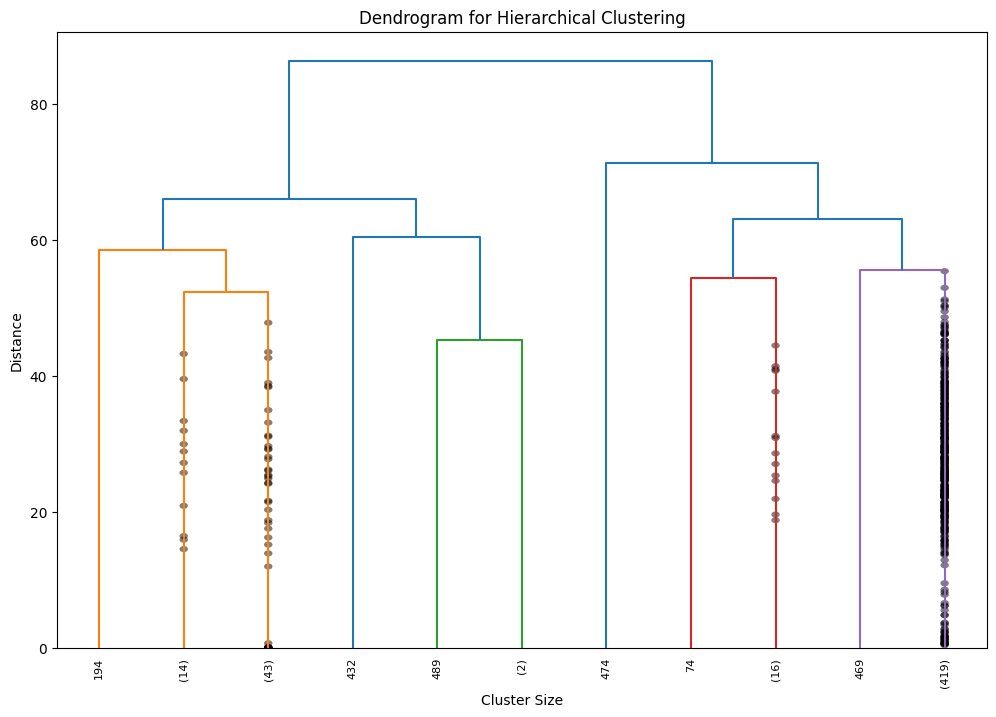

C:\Users\HP\AppData\Local\Temp\ipykernel_13040\2175731239.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_updated['Cluster'] = clusters


Silhouette Score for 3 clusters: 0.04563419613748128
Cluster Labels:
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 

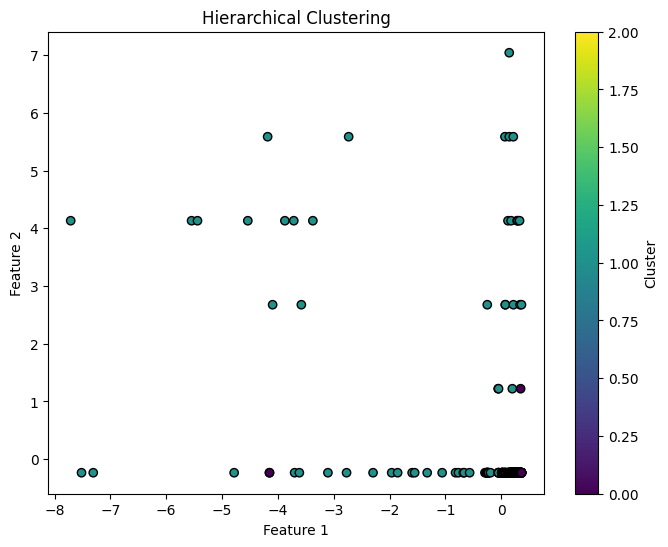

In [2]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Read the updated dataset (first 500 records)
file_path_updated = 'updated_dataset.csv'
df_updated = pd.read_csv(file_path_updated, nrows=500)

# Step 2: Handle missing or NaN values
numeric_columns = df_updated.select_dtypes(include=['float64', 'int64']).columns
df_updated[numeric_columns] = df_updated[numeric_columns].fillna(df_updated[numeric_columns].mean())

categorical_columns = df_updated.select_dtypes(include=['object']).columns
df_updated[categorical_columns] = df_updated[categorical_columns].fillna('missing')

# Step 3: Apply label encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_updated[col] = label_encoder.fit_transform(df_updated[col])

# Step 4: Prepare data for Hierarchical Clustering
X = df_updated.drop('Resolution', axis=1)

# Step 5: Normalize data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Determine the linkage matrix for hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Step 7: Visualize the dendrogram to help determine the number of clusters
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=90., leaf_font_size=8., show_contracted=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Step 8: Choose the optimal number of clusters and fit Hierarchical Clustering
k_optimal = 3  # Replace this with the optimal number of clusters determined from the dendrogram
hierarchical_clustering = AgglomerativeClustering(n_clusters=k_optimal)
clusters = hierarchical_clustering.fit_predict(X_scaled)

# Step 9: Add cluster labels to the DataFrame
df_updated['Cluster'] = clusters

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for {k_optimal} clusters: {silhouette_avg}")

# Optionally, print cluster labels if needed
print("Cluster Labels:")
print(clusters)

# Step 10: Visualize the clusters (for 2D data)
# For 2D visualization (example with first two features)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Step 11: Optionally, save the updated DataFrame with cluster labels to a CSV file
df_updated.to_csv('updated_dataset_with_clusters_hierarchical.csv', index=False)


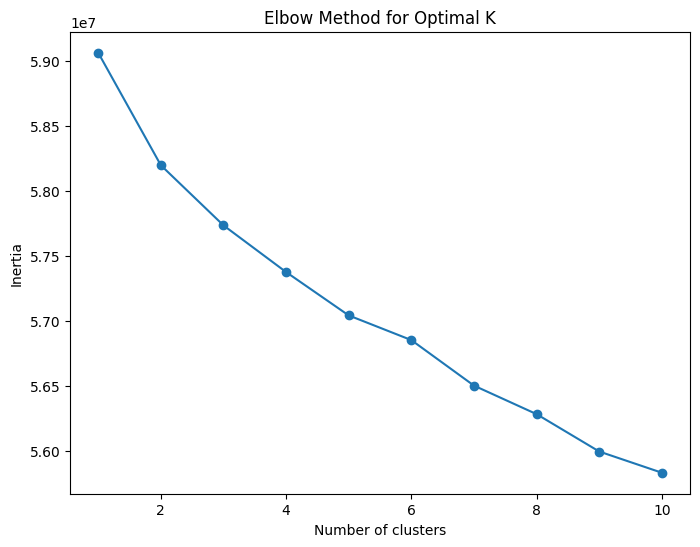

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_13040\1959193089.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_updated['Cluster'] = clusters


Silhouette Score for 3 clusters: 0.003972282907101745
Cluster Centroids:
[[ 0.64277042 -0.08328997  0.47862035 ... -0.10300635 -0.05995696
  -0.0340951 ]
 [-0.41080004 -0.16167563 -0.06489855 ...  0.07003431 -0.04781407
   0.05223135]
 [ 0.39014859  0.31017074 -0.11399717 ... -0.06957605  0.1081836
  -0.07179072]]


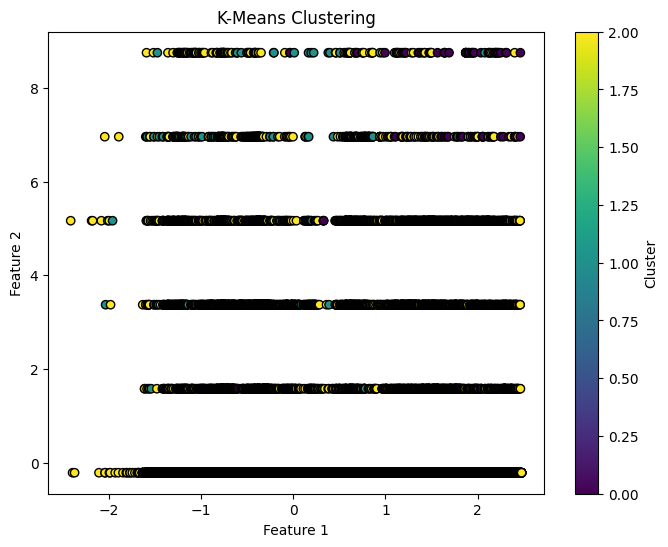

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# Step 1: Read the updated dataset
file_path_updated = 'updated_dataset.csv'
df_updated = pd.read_csv(file_path_updated)

# Step 2: Handle missing or NaN values
numeric_columns = df_updated.select_dtypes(include=['float64', 'int64']).columns
df_updated[numeric_columns] = df_updated[numeric_columns].fillna(df_updated[numeric_columns].mean())

categorical_columns = df_updated.select_dtypes(include=['object']).columns
df_updated[categorical_columns] = df_updated[categorical_columns].fillna('missing')

# Step 3: Apply label encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_updated[col] = label_encoder.fit_transform(df_updated[col])

# Step 4: Prepare data for K-Means
X = df_updated.drop('Resolution', axis=1)

# Step 5: Normalize data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Step 7: Choose the optimal number of clusters and fit K-Means
k_optimal = 3  # Replace this with the optimal number of clusters determined from the Elbow Method
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_scaled)

# Step 8: Assign clusters to the data
clusters = kmeans.predict(X_scaled)

# Step 9: Add cluster labels to the DataFrame
df_updated['Cluster'] = clusters

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for {k_optimal} clusters: {silhouette_avg}")

# Optionally, print cluster centroids if needed
print("Cluster Centroids:")
print(kmeans.cluster_centers_)

# Step 10: Visualize the clusters (for 2D data)
# For 2D visualization (example with first two features)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Step 11: Optionally, save the updated DataFrame with cluster labels to a CSV file
df_updated.to_csv('updated_dataset_with_clusters2.csv', index=False)